In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import arabic_reshaper
from arabic_reshaper import reshape
from bidi.algorithm import get_display
pd.set_option('display.max_columns', None)

In [3]:
df = pd.read_csv(r'../data/bull.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2784\2778762013.py:1: DtypeWarning: Columns (5,23,24,25) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(r'../data/bull.csv')


,link,type,date,address,area,infrastructure,floors_sum,homes_num,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,water,electricity,gas,age,elevator,parking,desc,price,mortgage,rent,facilities,Dollar,address_no_digits,region,latitude,longitude,Gold
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,3.0,2,جنوبی,آجرگری,سرامیک,کاغذ دیواری,فلزی,آبی,مستقل,مستقل,مستقل,7.0,ندارد,دارد,وکالتی,250000000.0,NaN,NaN,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391,ارمغان,11.0,36.347262,59.466991,583900.0
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",3.0,7.0,3.0,2,جنوبی,سنگ,سرامیک,کاغذ دیواری,های گلاس,آبی,مستقل,مستقل,مستقل,12.0,ندارد,دارد,شش دانگ ملک,695000000.0,NaN,NaN,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391,هاشمیه,9.0,36.307539,59.501074,583900.0
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",6.0,4.0,5.0,2,-,ترکیبی,سرامیک,گچی,-,-,مشترک,مستقل,مستقل,0.0,دارد,دارد,شش دانگ ملک,370000000.0,NaN,NaN,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391,حسابی جنوبی,10.0,36.349646,59.495644,583900.0
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,8.0,3.0,2,شمالی,سیمان سفید,سرامیک,نقاشی,فلزی,آبی,مستقل,مستقل,مستقل,15.0,ندارد,دارد,شش دانگ ملک,450000000.0,NaN,NaN,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391,کوثر شمالی,9.0,36.309638,59.510348,583900.0
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175.0,"data:image/png;base64,iVBORw0KGgoAAAANSUhEUgAA...",4.0,4.0,2.0,3,جنوبی,سنگ,سرامیک,کاغذ دیواری,کلاسیک,گازی,مستقل,مستقل,مستقل,0.0,دارد,دارد,شش دانگ ملک,962500000.0,NaN,NaN,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391,حسابی شمالی,10.0,36.362017,59.504458,583900.0


In [4]:
hf = pd.read_csv(r'new_data_sales.csv')
hf.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2784\2537165157.py:1: DtypeWarning: Columns (4,6,19,20,22,23,24) have mixed types. Specify dtype option on import or set low_memory=False.
  hf = pd.read_csv(r'new_data_sales.csv')


,link,type,date,address,area,floors_sum,homes_num,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,water,electricity,gas,age,elevator,parking,desc,price,mortage,rent,facilities,Dollar,geram18,geram24,address_no_digits,region
0,https://www.melkeirani.com/home/AZ8XY2Yt/37897...,فروش کلنگی,1403/12/21,رودکی 12,255,NaN,NaN,NaN,NaN,-,-,-,-,-,-,مستقل,مستقل,مستقل,NaN,ندارد,ندارد,سند : یک دانگ,23000000000,couldn't crawl,couldn't crawl,couldn't crawl,92285.0,6674600.0,8899300.0,رودکی,9.0
1,https://www.melkeirani.com/home/wZPDQ2Ti/37897...,فروش آپارتمان,1403/12/21,فکوری 74,95,2.0,2,1.0,1.0,جنوبی,سنگ,سرامیک,کاغذ,ام,آبی,مستقل,مستقل,مستقل,4.0,ندارد,ندارد,سند :,5000000000,couldn't crawl,couldn't crawl,"['شوفاژ', 'آبگرمکن', 'انباری']",92285.0,6674600.0,8899300.0,فکوری,9.0
2,https://www.melkeirani.com/home/wZO_t_2f/37897...,رهن و اجاره مغازه,1403/12/21,عبادی 70,20,0.0,0,0.0,0.0,جنوبی,شیشه,سرامیک,نقاشی,-,ندارد,مستقل,مستقل,مستقل,0.0,ندارد,ندارد,حضورمالک : ندارد,couldn't crawl,50000000,4800000,['بخاری'],92285.0,6674600.0,8899300.0,عبادی,2.0
3,https://www.melkeirani.com/home/wZOrNuzv/37897...,رهن و اجاره آپارتمان,1403/12/21,هدایت 25,90,3.0,3,3.0,1.0,جنوبی,سرامیک,سرامیک,نقاشی,ام,آبی,مستقل,مستقل,مستقل,13.0,ندارد,ندارد,حضورمالک : -,couldn't crawl,100000000,6000000,couldn't crawl,92285.0,6674600.0,8899300.0,هدایت,2.0
4,https://www.melkeirani.com/home/wZI_JRld/37897...,رهن و اجاره آپارتمان,1403/12/21,مجیدیه 17,110,5.0,21,2.0,2.0,شرقی,سنگ,سرامیک,نقاشی,ام,آبی,مستقل,مستقل,مستقل,2.0,دارد,دارد,حضورمالک : ندارد,couldn't crawl,200000000,15000000,"['شوفاژ', 'پکیج', 'پارکینگ', 'آسانسور', 'آیفون...",92285.0,6674600.0,8899300.0,مجیدیه,12.0


In [9]:
print(df.shape)
print(hf.shape)

(393698, 27)
(100906, 28)


In [10]:
df.columns

Index(['link', 'type', 'date', 'address', 'area', 'floors_sum', 'homes_num',
       'floor_num', 'rooms', 'property_direction', 'view', 'flooring', 'wall',
       'cabinet', 'cooler', 'age', 'elevator', 'parking', 'desc', 'price',
       'facilities', 'Dollar', 'address_no_digits', 'region', 'latitude',
       'longitude', 'geram24'],
      dtype='object')

In [11]:
hf.columns

Index(['link', 'type', 'date', 'address', 'area', 'floors_sum', 'homes_num',
       'floor_num', 'rooms', 'property_direction', 'view', 'flooring', 'wall',
       'cabinet', 'cooler', 'age', 'elevator', 'parking', 'desc', 'price',
       'facilities', 'Dollar', 'geram18', 'geram24', 'address_no_digits',
       'region', 'longitude', 'latitude'],
      dtype='object')

In [8]:
df.drop(['infrastructure','water', 'electricity','gas','mortgage','rent'],axis=1,inplace=True)
hf.drop(['water', 'electricity','gas','mortage','rent'],axis=1,inplace=True)

df.rename({'Gold':'geram24'},inplace=True,axis=1)
hf['longitude'] = None
hf['latitude'] = None

In [12]:
import json
import csv


with open('../data/geram18.json', 'r', encoding='utf-8') as json_file:
    data = json.load(json_file)

# Extract and save to CSV
with open('18ai.csv', 'w', newline='', encoding='utf-8-sig') as csvfile:
    writer = csv.writer(csvfile)
    writer.writerow(['date', 'geram18'])

    # Iterate over each entry in the data
    for entry in data["data"]:
        persian_date = entry[7]  # Persian date is the 8th element (index 7)
        price = int(int(entry[3].replace(',',''))/10)       # Price is the 4th element (index 3)
        writer.writerow([persian_date, price])

print("CSV file has been created successfully.")




df3 = pd.read_csv('18ai.csv')

df = pd.merge(df, df3[['date', 'geram18']], on='date', how='left')


CSV file has been created successfully.


In [19]:
missing_columns = [col for col in hf.columns if col not in df.columns]
print("ستون‌هایی که توی df2 نیستن:", missing_columns)

# قدم ۲: اضافه کردن ستون‌های گم‌شده به df2 با مقدار None
for col in missing_columns:
    df[col] = None

# قدم ۳: مرتب کردن ستون‌های df2 به ترتیب ستون‌های df1
df2 = df[hf.columns]

# قدم ۴: وصل کردن دیتافریم‌ها به صورت سطری
combined_df = pd.concat([df2, hf], axis=0, ignore_index=True)

combined_df.head()

ستون‌هایی که توی df2 نیستن: []


C:\Users\Lenovo\AppData\Local\Temp\ipykernel_2784\561038466.py:12: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  combined_df = pd.concat([df2, hf], axis=0, ignore_index=True)


,link,type,date,address,area,floors_sum,homes_num,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,age,elevator,parking,desc,price,facilities,Dollar,geram18,geram24,address_no_digits,region,longitude,latitude
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90.0,4.0,4.0,3.0,2.0,جنوبی,آجرگری,سرامیک,کاغذ دیواری,فلزی,آبی,7.0,ندارد,دارد,وکالتی,250000000.0,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391.0,438000.0,583900.0,ارمغان,11.0,59.466991,36.347262
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112.0,3.0,7.0,3.0,2.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,های گلاس,آبی,12.0,ندارد,دارد,شش دانگ ملک,695000000.0,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391.0,438000.0,583900.0,هاشمیه,9.0,59.501074,36.307539
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81.0,6.0,4.0,5.0,2.0,-,ترکیبی,سرامیک,گچی,-,-,0.0,دارد,دارد,شش دانگ ملک,370000000.0,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391.0,438000.0,583900.0,حسابی جنوبی,10.0,59.495644,36.349646
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81.0,4.0,8.0,3.0,2.0,شمالی,سیمان سفید,سرامیک,نقاشی,فلزی,آبی,15.0,ندارد,دارد,شش دانگ ملک,450000000.0,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391.0,438000.0,583900.0,کوثر شمالی,9.0,59.510348,36.309638
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175.0,4.0,4.0,2.0,3.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,کلاسیک,گازی,0.0,دارد,دارد,شش دانگ ملک,962500000.0,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391.0,438000.0,583900.0,حسابی شمالی,10.0,59.504458,36.362017


In [20]:
combined_df.shape

(494604, 28)

In [21]:
combined_df['type'].value_counts()

type
فروش آپارتمان           267503
رهن و اجاره آپارتمان    134627
فروش ویلایی              33042
رهن و اجاره مغازه        20313
رهن و اجاره ویلایی       12682
فروش مغازه               11872
رهن و اجاره دفترکار       5923
فروش زمین                 3702
فروش کلنگی                2706
پیش فروش آپارتمان         1162
فروش دفترکار              1057
فروش باغ                     6
                             5
فروش -                       4
Name: count, dtype: int64

In [17]:
hf.shape

(100906, 28)

In [18]:
df2.shape

(100906, 28)

In [23]:
lf = combined_df[combined_df['type'] == 'فروش آپارتمان']
lf.head()

,link,type,date,address,area,floors_sum,homes_num,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,age,elevator,parking,desc,price,facilities,Dollar,geram18,geram24,address_no_digits,region,longitude,latitude
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90.0,4.0,4.0,3.0,2.0,جنوبی,آجرگری,سرامیک,کاغذ دیواری,فلزی,آبی,7.0,ندارد,دارد,وکالتی,250000000.0,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391.0,438000.0,583900.0,ارمغان,11.0,59.466991,36.347262
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112.0,3.0,7.0,3.0,2.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,های گلاس,آبی,12.0,ندارد,دارد,شش دانگ ملک,695000000.0,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391.0,438000.0,583900.0,هاشمیه,9.0,59.501074,36.307539
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81.0,6.0,4.0,5.0,2.0,-,ترکیبی,سرامیک,گچی,-,-,0.0,دارد,دارد,شش دانگ ملک,370000000.0,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391.0,438000.0,583900.0,حسابی جنوبی,10.0,59.495644,36.349646
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81.0,4.0,8.0,3.0,2.0,شمالی,سیمان سفید,سرامیک,نقاشی,فلزی,آبی,15.0,ندارد,دارد,شش دانگ ملک,450000000.0,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391.0,438000.0,583900.0,کوثر شمالی,9.0,59.510348,36.309638
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175.0,4.0,4.0,2.0,3.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,کلاسیک,گازی,0.0,دارد,دارد,شش دانگ ملک,962500000.0,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391.0,438000.0,583900.0,حسابی شمالی,10.0,59.504458,36.362017


In [24]:
lf.shape

(267503, 28)

In [27]:
lf.to_csv('salessss.csv',index=False,encoding='utf-8-sig')


In [27]:
df = pd.read_csv('salessss.csv')
df.head()

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18268\2306031916.py:1: DtypeWarning: Columns (6,16,17) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('salessss.csv')


,link,type,date,address,area,floors_sum,homes_num,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,age,elevator,parking,desc,price,facilities,Dollar,geram18,geram24,address_no_digits,region,longitude,latitude
0,https://www.melkeirani.com/old/melk-77925-%D9%...,فروش آپارتمان,1398/01/17,ارمغان 7,90.0,4.0,4.0,3.0,2.0,جنوبی,آجرگری,سرامیک,کاغذ دیواری,فلزی,آبی,7.0,ندارد,دارد,وکالتی,250000000.0,"آبگرمکن,بخاری,پارکینگ,تراس,اپن,کمد دیواری,هود,",13391.0,438000.0,583900.0,ارمغان,11.0,59.466991,36.347262
1,https://www.melkeirani.com/old/melk-77923-%D9%...,فروش آپارتمان,1398/01/17,هاشمیه 59,112.0,3.0,7.0,3.0,2.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,های گلاس,آبی,12.0,ندارد,دارد,شش دانگ ملک,695000000.0,"شوفاژ,پکیج,انباری,پارکینگ,تراس,اپن,آیفون تصویر...",13391.0,438000.0,583900.0,هاشمیه,9.0,59.501074,36.307539
2,https://www.melkeirani.com/old/melk-77917-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی جنوبی 11 و 13,81.0,6.0,4.0,5.0,2.0,-,ترکیبی,سرامیک,گچی,-,-,0.0,دارد,دارد,شش دانگ ملک,370000000.0,"انباری,پارکینگ,تراس,پنجره دوجداره,نگهبان,آسانس...",13391.0,438000.0,583900.0,حسابی جنوبی,10.0,59.495644,36.349646
3,https://www.melkeirani.com/old/melk-77922-%D9%...,فروش آپارتمان,1398/01/17,کوثر شمالی 30,81.0,4.0,8.0,3.0,2.0,شمالی,سیمان سفید,سرامیک,نقاشی,فلزی,آبی,15.0,ندارد,دارد,شش دانگ ملک,450000000.0,"آبگرمکن,بخاری,انباری,پارکینگ,تراس,اپن,آیفون تص...",13391.0,438000.0,583900.0,کوثر شمالی,9.0,59.510348,36.309638
4,https://www.melkeirani.com/old/melk-77909-%D9%...,فروش آپارتمان,1398/01/17,بین حسابی شمالی 35 و 37,175.0,4.0,4.0,2.0,3.0,جنوبی,سنگ,سرامیک,کاغذ دیواری,کلاسیک,گازی,0.0,دارد,دارد,شش دانگ ملک,962500000.0,"شوفاژ,پکیج,اطفاء حریق,انباری,پارکینگ,تراس,پنجر...",13391.0,438000.0,583900.0,حسابی شمالی,10.0,59.504458,36.362017


### drop unwanted columns and fill nans

In [28]:
df.drop(['type','homes_num','address_no_digits','longitude','latitude'],axis=1,inplace=True)

# forward fill on dollar and gold columns
columns_to_fill = ['Dollar', 'geram18', 'geram24']
df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')

df.replace(['-', "couldn't crawl","c, o, u, l, d, n, ', t, , c, r, a, w, l"], np.nan, inplace=True)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_18268\4089119123.py:5: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  df[columns_to_fill] = df[columns_to_fill].fillna(method='ffill')


In [29]:
df = df.dropna(subset=['address','region'])
df = df[df.isna().sum(axis=1) < 7]

In [5]:
df.isna().sum()

link                      0
date                      0
address                   0
area                  73425
floors_sum             2168
floor_num               445
rooms                     0
property_direction    24971
view                  36464
flooring               1161
wall                  30968
cabinet               35341
cooler                14152
age                    2523
elevator                  0
parking                   0
desc                  11546
price                 45277
facilities            37549
Dollar                    0
geram18                   0
geram24                   0
region                    0
dtype: int64

# reasign values

In [30]:
def adjust_area(area, group_mean):
    if pd.isna(area):
        return area
    if area <35:
        return group_mean
    if 10000 <= area < 50000:
        return area / 100
    elif area >= 50000:
        return area / 1000
    return area

df['area'] = df.groupby('region')['area'].transform(lambda x: x.apply(lambda area: adjust_area(area, x.mean())))
def adjust_area_price(row, group_mean_area, group_mean_price):
    area = row['area']
    price = row['price']
    
    # اگر area نان باشه، با میانگین پر می‌کنیم
    if pd.isna(area):
        return group_mean_area
    
    # اگر price نان باشه، area رو با میانگین پر می‌کنیم و برمی‌گردونیم
    if pd.isna(price):
        return group_mean_area
        
    # برای مساحت‌های بزرگتر از 300
    if area > 300:
        if pd.isna(price/area):  # چک کردن برای حالتی که تقسیم نتیجه نان بده
            return group_mean_area
        # محاسبه قیمت تقسیم بر مساحت
        price_per_area = price / area
        # مقایسه با میانگین قیمت منطقه
        if price_per_area < group_mean_price:
            return group_mean_area
        return area
    
    # برای بقیه موارد مقدار اصلی area برگردونده میشه
    return area

# اعمال تابع روی دیتافریم
df['area'] = df.groupby('region').apply(
    lambda g: g.apply(
        lambda row: adjust_area_price(
            row, 
            g['area'].mean(),  # میانگین مساحت گروه
            (g['price'] / g['area']).mean()  # میانگین قیمت گروه
        ), axis=1)
).reset_index(drop=True)

# 4. اصلاح ستون rooms
def adjust_rooms(rooms):
    if pd.isna(rooms):
        return rooms
    if rooms == 14:
        return 2
    elif rooms > 100:
        return np.nan
    return rooms

df['rooms'] = df['rooms'].apply(adjust_rooms)


df['view'] = df['view'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
agori_materials = ['آجر سه سانت', 'آجرگری', 'سفال', 'آجر ','آجر', 'سفال سرامیک']
stone_materials = ['سنگ', 'سنگ و آجر', 'سنگ و سفال', 'گرانیت', 'گرانولیت', 'رومی گرانیت']
siman_materials = ['سیمان سفید', 'سیمان سیاه', 'سیمان', 'سیمان رنگی']
ceramic_materials = ['سرامیک', 'کاشی']
modern_facades = ['شیشه‌ای', 'کامپوزیت', 'ترمووود', 'آلومینیومی', 'فلزی', 'شیشه رفلکس', 'شیشه سکوریت', 'شیشه','رومی', 'رومی و سفال','آلومینیوم']
simple_traditional = ['کاهگلی', 'چوبی', 'گچی', 'رنگی', 'کنیتکس', 'دیوارپوش']
unknown = ['غیره','ترکیبی']

# تابع برای دسته‌بندی
def categorize_view(view):
    if pd.isna(view):
        return view
    view = view.lower()
    if view in agori_materials:
        return 'آجری'
    elif view in stone_materials:
        return 'سنگ'
    elif view in siman_materials:
        return 'سیمان'
    elif view in ceramic_materials:
        return 'سرامیک'
    elif view in modern_facades:
        return 'نما مدرن'
    elif view in simple_traditional:
        return 'نما سنتی/ساده'
    elif view in unknown:
        return 'غیره'
    return view  # برای اطمینان از اینکه هیچ مقداری از دست نره

df['view'] = df['view'].apply(categorize_view)

df['flooring'] = df['flooring'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
ceramic_flooring = ['سرامیک', 'کاشی','موکت و سرامیک','موکت', 'فرش','تک سرام','سنگ و سرامبک','سرامیک و سیمان','سرامیک و موزاییک','سرامیک و طرح پارکت','سرامیک و کفپوش']
wooden_flooring = ['پارکت', 'لمینت', 'چوبی','سرامیک و پارکت','پارکت چوب','کفپوش','پارکت لمینت','پارکت و موکت']

synthetic_flooring = ['pvc', 'اپوکسی', 'لینولئوم', 'وینیل','کف‌پوش PVC','کف‌پوش pvc']
industrial_flooring = ['بتن', 'سیمان', 'موزاییک','موزاییک','موزائیک','موزائیک و موکت','طرح پارکت','موکت و طرح پارکت','تک','کف‌پوش ساده']
luxury_flooring = ['گرانیت', 'مرمر', 'سنگ','موکت و سنگ','پارکت و سنگ']
unknown = ['غیره', 'سایر']

# تابع برای دسته‌بندی
def categorize_flooring(flooring):
    if pd.isna(flooring):
        return flooring
    flooring = flooring.lower()
    if flooring in ceramic_flooring:
        return 'کف‌پوش سرامیکی'
    elif flooring in wooden_flooring:
        return 'کف‌پوش چوبی'
    elif flooring in synthetic_flooring:
        return 'کف‌پوش مصنوعی'
    elif flooring in industrial_flooring:
        return 'کف‌پوش ساده'
    elif flooring in luxury_flooring:
        return 'کف‌پوش لوکس'
    elif flooring in unknown:
        return 'نامشخص'
    return flooring  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['flooring'] = df['flooring'].apply(categorize_flooring)


df['wall'] = df['wall'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
unknown = ['غیره', 'سایر','ترکیبی','پی','هبلکس','پارکت','به سلیقه مشتری','به']
painted_wall = ['رنگ', 'رنگ روغنی','نقاشی']
wallpaper = ['کاغذ دیواری', 'کاغذ دیواری قابل شستشو','کاغذ','نقاشی و کاغذ']
plaster_wall = ['گچ', 'گچ و خاک', 'گچ سفید','گچی','دیوار گچی']
traditional_materials = ['آجر', 'سنگ', 'سیمان','کاشی','سرامیک']
wooden_wall = ['چوب', 'پنل چوبی', 'دیوارپوش چوبی']
synthetic_wall = ['pvc', 'دیوارپوش', 'پنل پلاستیکی','پی وی سی']
decorative_coating = ['کنیتکس', 'بلکا', 'مولتی کالر','بلیکا','پانل کوبی','پانل','پنل کوبی','پانل','سلولزی','کنتکس','الیاف']


# تابع برای دسته‌بندی
def categorize_wall(wall):
    if pd.isna(wall):
        return wall
    wall = wall.lower()
    if wall in painted_wall:
        return 'رنگی'
    elif wall in wallpaper:
        return 'کاغذ دیواری'
    elif wall in plaster_wall:
        return 'گچی'
    elif wall in traditional_materials:
        return 'سنتی'
    elif wall in wooden_wall:
        return 'چوبی'
    elif wall in synthetic_wall:
        return 'مصنوعی'
    elif wall in decorative_coating:
        return 'پوشش تزئینی'
    elif wall in unknown:
        return 'ترکیبی'
    return wall  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['wall'] = df['wall'].apply(categorize_wall)


df['cabinet'] = df['cabinet'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
mdf_cabinet = ['mdf', 'ام دی اف', 'هایگلاس', 'ام دی اف و هایگلاس', 'های گلاس', 'های گلس','طرح', 'ام', 'mdf های گلاس', 'روکش ام دی اف', 'های', 'طرح ام دی اف', 'اچ دی اف', 'وکیوم', 'اچ پی ال', 'اچ']
wooden_cabinet = ['چوبی', 'چوب', 'روکش چوب', 'چوب و mdf', 'طرح چوب', 'روکش']
metal_cabinet = ['فلزی', 'آلومینیومی', 'استیل','فلز']
synthetic_cabinet = ['pvc', 'پلاستیکی', 'لمینت','پی وی سی','پی']
glass_cabinet = ['شیشه‌ای', 'شیشه و آلومینیوم']
combined_cabinet = ['ترکیبی', 'mdf و فلزی', 'چوب و فلزی', 'هایگلاس و فلزی','فلز و ام دی اف','های گلاس و فلز','طرح جزیره فایبرگلاس','فلز و چوب']
simple_old_cabinet = ['فرمونیکا', 'ملامینه', 'نئوپان','کلاسیک', 'نئوکلاسیک']
unknown = ['غیره', 'سایر']

# تابع برای دسته‌بندی
def categorize_cabinet(cabinet):
    if pd.isna(cabinet):
        return cabinet
    cabinet = cabinet.lower()
    if cabinet in mdf_cabinet:
        return 'MDF'
    elif cabinet in wooden_cabinet:
        return 'چوبی'
    elif cabinet in metal_cabinet:
        return 'فلزی'
    elif cabinet in synthetic_cabinet:
        return 'مصنوعی'
    elif cabinet in glass_cabinet:
        return 'شیشه‌ای'
    elif cabinet in combined_cabinet:
        return 'کابینت ترکیبی'
    elif cabinet in simple_old_cabinet:
        return 'ساده/قدیمی'
    elif cabinet in unknown:
        return 'نامشخص'
    return cabinet  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['cabinet'] = df['cabinet'].apply(categorize_cabinet)


df['property_direction'] = df['property_direction'].str.strip().str.lower()
values_to_replace = ['0', 'انتخاب نشده', 'انتخاب']
df['property_direction'] = df['property_direction'].replace(values_to_replace, np.nan)
# 4. تعریف دسته‌بندی‌ها
north = ['شمالی']
south = ['جنوبی']
east = ['شرقی']
west = ['غربی']

multi_direction = ['دو کله', 'سه بر', 'چهار بر', 'چند بر','دونبش','دو ممر','شمال شرقی', 'شمال غربی','جنوب شرقی', 'جنوب غربی','جنوبی شرقی','جنوبی غربی','سه نبش','شمالی غربی','شمالی شرقی','شمالی جنوبی','غربی شرقی']
unknown = ['غیره', 'سایر']

# تابع برای دسته‌بندی
def categorize_direction(direction):
    if pd.isna(direction):
        return direction
    direction = direction.lower()
    if direction in north:
        return 'شمالی'
    elif direction in south:
        return 'جنوبی'
    elif direction in east:
        return 'شرقی'
    elif direction in west:
        return 'غربی'
    elif direction in multi_direction:
        return 'چندجهتی'
    elif direction in unknown:
        return 'نامشخص'
    return direction  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['property_direction'] = df['property_direction'].apply(categorize_direction)


df['cooler'] = df['cooler'].str.strip().str.lower()

# 4. تعریف دسته‌بندی‌ها
water_cooler = ['آبی', 'کولر آبی']
gas_cooler = ['گازی', 'کولر گازی', 'اسپلیت', 'داکت اسپلیت','آبی و گازی']
advanced_system = ['هواساز', 'فن کوئل']
no_cooling = ['ندارد', 'بدون سرمایش']

# تابع برای دسته‌بندی
def categorize_cooler(cooler):
    if pd.isna(cooler):
        return cooler
    
    cooler = cooler.lower()
    
    # مقادیری که مشخصاً به کولر اشاره ندارن
    if 'کولر پله ها: نرم و پهن سند آما' in cooler or 'کولر \nسند آزاد و آماده گرفتن و' in cooler:
        return 'ندارد'
    
    # بررسی وجود کولر آبی
    if 'آبی' in cooler or 'کولر آبی' in cooler:
        # بررسی ترکیبی بودن
        if 'گازی' in cooler or 'اسپیلت' in cooler or 'اسپلیت' in cooler:
            return 'کولر ترکیبی'
        return 'کولر آبی'
    
    # بررسی وجود کولر گازی یا اسپلیت
    if 'گازی' in cooler or 'کولر گازی' in cooler or 'اسپیلت' in cooler or 'اسپلیت' in cooler or 'داکت اسپلیت' in cooler or 'داکت اسپیلیت' in cooler:
        return 'کولر گازی'
    
    # بررسی سیستم‌های پیشرفته
    if 'هواساز' in cooler or 'فن کوئل' in cooler:
        return 'سیستم پیشرفته'
    
    # بررسی بدون سرمایش
    if 'ندارد' in cooler or 'بدون سرمایش' in cooler:
        return 'ندارد'
    
    return cooler

# اعمال دسته‌بندی
df['cooler'] = df['cooler'].apply(categorize_cooler)

df['desc'] = df['desc'].str.strip().str.lower()
df['desc'] = df['desc'].replace({'سند : ': '','سند':'','0':np.nan,':':np.nan,'ملک':np.nan}, regex=True)
# 4. تعریف دسته‌بندی‌ها
six_dang = ['شش دانگ', 'شش دانگ ملک', 'ششدانگ\n———————————————', 'شش دانگ مادر کاغذی', 'شش دانگ سیم سربی ملکی','شش دانگ ملک','شش دانگ مادر  کاغذی','420متر\n✔️مساحت آپارتمان مورد نظر طبق : 79متر +', 'ششدانگ\n\n\n\n———————————————']
single_page = ['تک‌برگ']
gholnameh = ['قولنامه','قولنامه‌ای به پشت به پشت همگی موجود است.\nمتراژ زیر ', 'قول‌نامه‌ای', 'قولنامه ای', 'قولنامه ملک', 'قولنامه ای مشاع', 'شش دانگ قولنامه ای مشاع', 'قولنامه مادر سیم سربی','قولنامه ای','قولنامه مادر  کاغذی','قولنامه ایی پشت درپشت کامل\nفقط تماس پاسخگو هستم\n——','قولنامه‌ای به پشت به پشت همگی موجود است.\nمتراژ زیر']
vakalati = ['وکالتی', 'شش دانگ وکالتی', 'قولنامه وکالتی', 'دو دانگ وکالتی', 'سه دانگ وکالتی', 'چهار دانگ وکالتی', 
            'یک دانگ وکالتی', 'وکالت طبقه: دوم .دو واحدی تعداد واحد: پنج واحد کف', 
            'وکالتی بازدید آزاد جانباز 7 منفرد 6 —————————————', 'وکالتی هولوگرام دار ثبت در محضر و معتبر است (مالک','وکالتی هولوگرام دار ثبت در محضر  و معتبر است (مالک']


mangoleh_dar = ['منگوله‌دار', 'سیم سربی ملکی']
astaneh = ['شش دانگ آستانه', 'آستانه', 'سه دانگ آستانه', 'دو دانگ آستانه', 'یک دانگ آستانه', 'قولنامه آستانه','شش دانگ آستانه']
oghafi = ['شش دانگ اوقافی', 'اوقافی', 'قولنامه اوقافی', 'سه دانگ اوقافی', 'دو دانگ اوقافی', 'یک دانگ اوقافی','چهار دانگ اوقافی']
sadat = ['شش دانگ سادات', 'سادات', 'سه دانگ سادات']
three_dang = ['سه دانگ', 'سه دانگ ملک','سه دانگ','دو دانگ','یک دانگ', 'یک دانگ ملک','دو دانگ', 'دو دانگ ملک','چهار دانگ ملک','چهار دانگ']
sarghofli = ['سرقفلی', 'شش دانگ سرقفلی']
unknown = ['سایر']

# تابع برای دسته‌بندی
def categorize_desc(desc):
    if pd.isna(desc):
        return desc
    desc = desc.lower()
    if desc in six_dang:
        return 'شش دانگ'
    elif desc in single_page:
        return 'تک‌برگ'
    elif desc in gholnameh:
        return 'قولنامه'
    elif desc in vakalati:
        return 'وکالتی'
    elif desc in mangoleh_dar:
        return 'منگوله‌دار'
    elif desc in astaneh:
        return 'آستانه'
    elif desc in oghafi:
        return 'اوقافی'
    elif desc in sadat:
        return 'سادات'
    elif desc in three_dang:
        return 'سه دانگ'
    elif desc in sarghofli:
        return 'سرقفلی'
    elif desc in unknown:
        return 'سایر'
    return desc  # برای اطمینان از اینکه هیچ مقداری از دست نره

# اعمال دسته‌بندی
df['desc'] = df['desc'].apply(categorize_desc)

C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9744\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9744\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9744\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9744\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\Temp\ipykernel_9744\2116904840.py:43: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[i].set_xticklabels(new_labels, rotation=90)
C:\Users\Lenovo\AppData\Local\

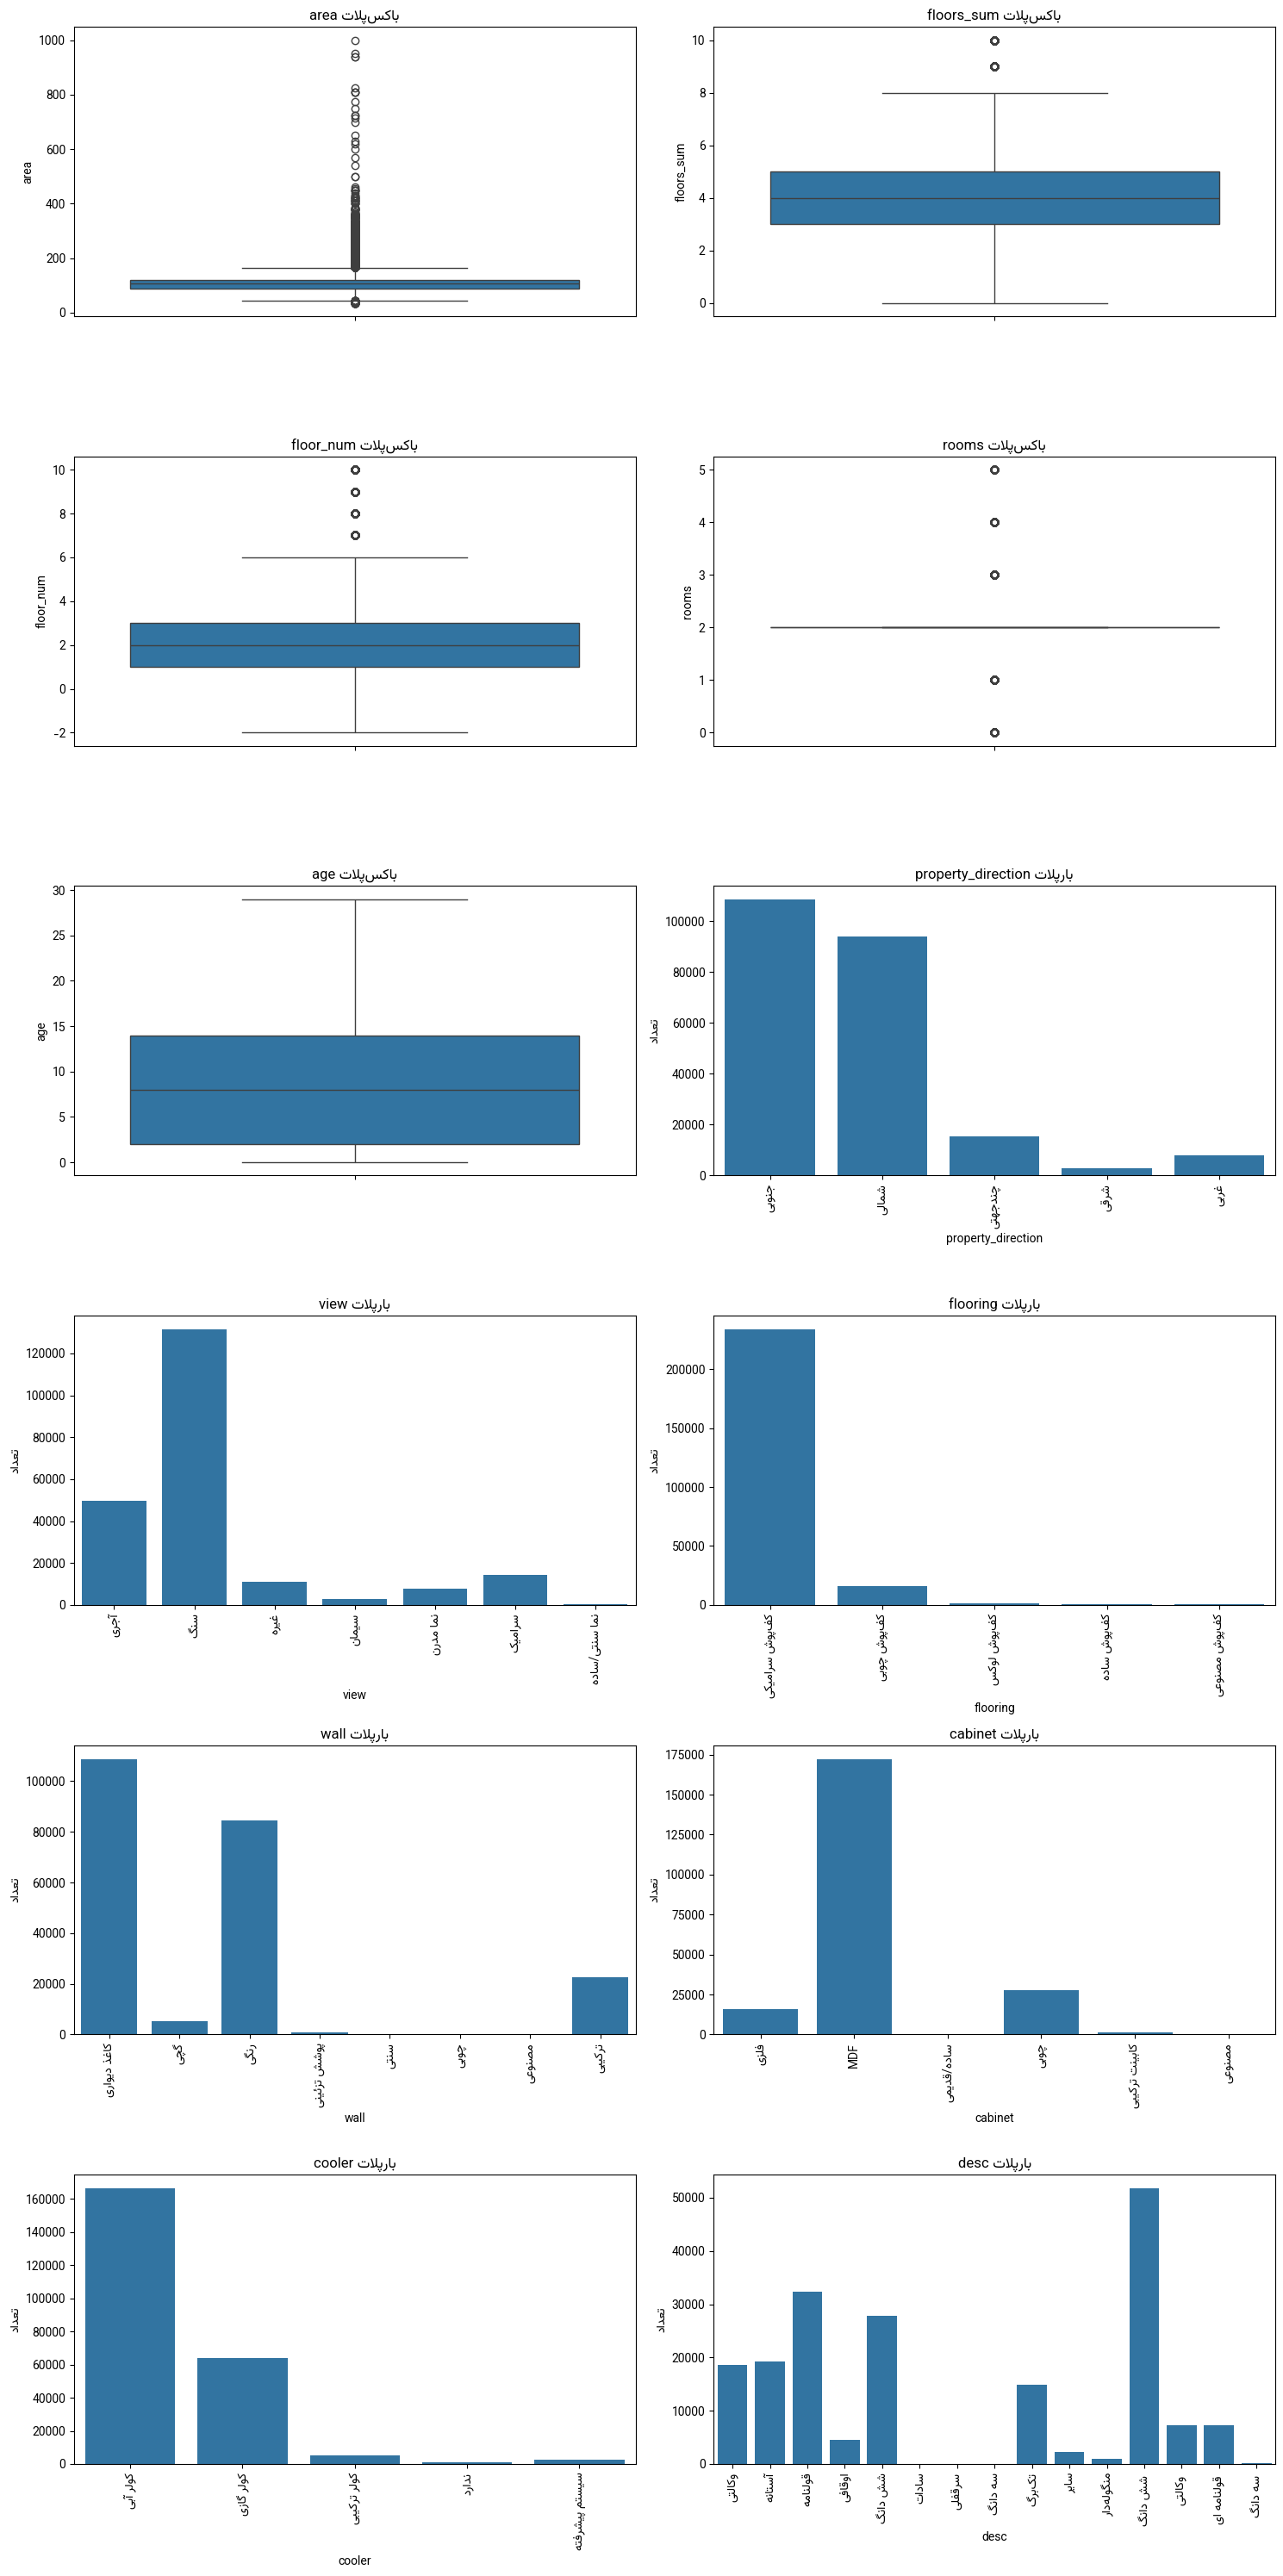

In [7]:
from matplotlib import font_manager
font_path = '../fonts/Vazirmatn-Regular.ttf' 
if not font_path:
    # اگه فونت رو نصب کردی، فقط اسم فونت رو بذار
    font_name = 'Vazirmatn'
else:
    font_manager.fontManager.addfont(font_path)
    font_name = font_manager.FontProperties(fname=font_path).get_name()

def persian_text(text):
    reshaped_text = arabic_reshaper.reshape(text)
    return get_display(reshaped_text)
# تنظیم فونت پیش‌فرض برای matplotlib
plt.rcParams['font.family'] = font_name
plt.rcParams['axes.unicode_minus'] = False
numeric_columns = ['area', 'floors_sum', 'floor_num', 'rooms', 'age']
categorical_columns = ['property_direction', 'view', 'flooring', 'wall', 'cabinet', 'cooler','desc']
all_columns = numeric_columns + categorical_columns  # 11 ستون

# 4. تنظیمات چیدمان (2 نمودار در هر سطر)
n_cols = 2  # تعداد ستون‌ها در هر سطر
n_rows = (len(all_columns) + 1) // 2  # تعداد سطرها (11 نمودار → 6 سطر)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()  # تبدیل به آرایه یک‌بعدی برای دسترسی راحت‌تر

# 5. رسم نمودارها
for i, column in enumerate(all_columns):
    if column in numeric_columns:
        # باکس‌پلات برای ستون‌های عددی
        sns.boxplot(data=df, y=column, ax=axes[i])
        axes[i].set_title(persian_text(f'باکس‌پلات {column}'))
        axes[i].set_ylabel(persian_text(column))
    else:
        # بارپلات برای ستون‌های دسته‌ای
        sns.countplot(data=df, x=column, ax=axes[i])
        axes[i].set_title(persian_text(f'بارپلات {column}'))
        axes[i].set_xlabel(persian_text(column))
        axes[i].set_ylabel(persian_text('تعداد'))
        axes[i].tick_params(axis='x', rotation=90)
        # تنظیم برچسب‌های محور x برای نمایش درست فارسی
        labels = axes[i].get_xticklabels()
        new_labels = [persian_text(label.get_text()) for label in labels]
        axes[i].set_xticklabels(new_labels, rotation=90)

# 6. حذف محورهای اضافی (اگه تعداد نمودارها فرد باشه)
for j in range(i + 1, len(axes)):
    fig.delaxes(axes[j])

# 7. تنظیم فاصله‌ها و نمایش
plt.tight_layout()
plt.show()


In [31]:
df = df.sort_values(by='date')
df = df.iloc[1:].reset_index(drop=True)
df.head()

,link,date,address,area,floors_sum,floor_num,rooms,property_direction,view,flooring,wall,cabinet,cooler,age,elevator,parking,desc,price,facilities,Dollar,geram18,geram24,region
0,https://maskanyaban.ir/home/114/فروش-آپارتمان-...,1395/01/24,مشهد - امامت12,100.0,5.0,4.0,3.0,شمالی,سنگ,کف‌پوش سرامیکی,رنگی,MDF,کولر آبی,1.0,True,True,NaN,560000000.0,"آسانسور, پارکینگ, انباری, تراس, آیفون تصویری, ...",3466.0,105680.0,140990.0,11.0
1,https://maskanyaban.ir/home/106/فروش-آپارتمان-...,1395/01/24,مشهد - پیروزی24 خیابان رهایی9,76.0,3.0,2.0,2.0,جنوبی,سنگ,کف‌پوش سرامیکی,کاغذ دیواری,MDF,کولر آبی,3.0,False,True,NaN,150000000.0,"پارکینگ, انباری, تراس, آیفون تصویری, درب برقی",3466.0,105680.0,140990.0,9.0
2,https://maskanyaban.ir/home/105/فروش-آپارتمان-...,1395/01/24,مشهد - هنرستان23,NaN,4.0,3.0,3.0,شمالی,سنگ,کف‌پوش سرامیکی,کاغذ دیواری,MDF,کولر گازی,6.0,True,True,NaN,NaN,"آسانسور, پارکینگ, انباری, تراس, آیفون تصویری, ...",3466.0,105680.0,140990.0,9.0
3,https://maskanyaban.ir/home/111/فروش-آپارتمان-...,1395/01/24,مشهد - دلاوران20 نخل3 زیتون1,135.0,4.0,0.0,1.0,شمالی,سنگ,کف‌پوش سرامیکی,کاغذ دیواری,فلزی,کولر آبی,4.0,False,True,NaN,70000000.0,"پارکینگ, انباری, تراس",3466.0,105680.0,140990.0,9.0
4,https://maskanyaban.ir/home/117/فروش-آپارتمان-...,1395/01/24,مشهد - آموزگار10,110.0,4.0,2.0,3.0,شمالی,سنگ,کف‌پوش سرامیکی,رنگی,MDF,کولر آبی,11.0,False,True,NaN,290000000.0,"پارکینگ, تراس, آیفون تصویری, درب برقی",3466.0,105680.0,140990.0,11.0


In [32]:
price_null = df['price'].isna()

# شرط 2: محاسبه تعداد ستون‌های null در هر سطر (به جز ستون price)
null_counts = df.drop(columns=['price','facilities','desc']).isna().sum(axis=1)

# شرط ترکیبی: سطرهایی که price null است و تعداد ستون‌های null دیگر بیشتر از 5 است
rows_to_drop = df[price_null & (null_counts > 3)].index

# حذف سطرهای شناسایی‌شده
df = df.drop(index=rows_to_drop)


In [33]:
def convert_to_boolean(value):
    # مقادیر نشان‌دهنده وجود پارکینگ
    if value in ['پارکینگ', 'دارد', 'TRUE']:
        return True
    # مقادیر نشان‌دهنده عدم وجود پارکینگ
    elif value in [0.0, 'ندارد', 'FALSE']:
        return False
    # اگر مقدار دیگری بود (مثلاً NaN)، همان مقدار را برگردان
    return value

# اعمال تابع به ستون parking
df['parking'] = df['parking'].apply(convert_to_boolean)
df['elevator'] = df['elevator'].apply(convert_to_boolean)

def normalize_facilities(value):
    if pd.isna(value):  # اگر مقدار null بود، همان را برگردان
        return value
    # تبدیل به رشته
    value_str = str(value)
    # حذف کروشه‌ها و کوتیشن‌ها
    value_str = value_str.replace('[', '').replace(']', '').replace("'", '').replace('"', '')
    # نرمال‌سازی و حذف فاصله‌های اضافی بین کلمات
    value_str = ','.join(word.strip() for word in value_str.split(',') if word.strip())
    # حذف فاصله‌های اضافی از ابتدا و انتها
    value_str = value_str.strip()
    return value_str

# اعمال تابع به ستون facilities
df['facilities'] = df['facilities'].apply(normalize_facilities)

def check_facility(facilities, items):
    if pd.isna(facilities):
        return False
    # جدا کردن آیتم‌ها
    facility_list = facilities.split(',')
    # بررسی هر آیتم در items
    for item in items:
        # بررسی می‌کنیم آیا item در هر یک از facility_list به عنوان بخشی از رشته وجود دارد
        if any(item in facility.strip() for facility in facility_list):
            return True
    return False

# 1. اضافه کردن ستون anbari
df['Warehouse'] = df['facilities'].apply(lambda x: check_facility(x, 'انباری'))
df['Wardrobe'] = df['facilities'].apply(lambda x: check_facility(x, ['کمددیواری', 'کمد دیواری']))
# 2. به‌روزرسانی ستون parking بر اساس facilities
mask = (df['parking'] == False) & (df['facilities'].apply(lambda x: check_facility(x, 'پارکینگ')))
df.loc[mask, 'parking'] = True

mask = (df['elevator'] == False) & (df['facilities'].apply(lambda x: check_facility(x, ['آسانسور', 'اسانسور'])))
df.loc[mask, 'elevator'] = True

mask = (df['cooler'].isna()) & (df['facilities'].apply(lambda x: check_facility(x, ['اسپیلیت', 'داکت اسپلیت','اسپلیت','فن','فن کوئل','داکت اسپیلت'])))
df.loc[mask, 'cooler'] = 'سیستم پیشرفته'

def check_warmer(facilities):
    if pd.isna(facilities):
        return None
    
    facility_list = facilities.split(',')
    warmer_types = {
        'شوفاژ': 'شوفاژ',
        'پکیج': 'پکیج',
        'پکبج':'پکیج',
        'گرما از کف': 'کف',
        'گرمایش': 'کف',
        'بخاری': 'بخاری',
        'شومینه': 'شومینه'
    }
    
    # نرمال‌سازی و بررسی تمام آیتم‌ها
    found_warmer = None
    for facility in facility_list:
        facility = facility.strip()
        # نرمال‌سازی برای تنوع در املا
        facility = facility.replace('ي', 'ی')  # تبدیل "ی" عربی به "ی" معمولی
        for key, value in warmer_types.items():
            if key in facility:
                # اولویت‌بندی: اگر پکیج پیدا شد، آن را ترجیح می‌دهیم
                if key == 'پکیج':
                    return 'پکیج'
                if not found_warmer:  # اولین تطابق را ذخیره می‌کنیم
                    found_warmer = value
    
    return found_warmer if found_warmer else None

# اضافه کردن ستون warmer
df['warmer'] = df['facilities'].apply(check_warmer)


parking_items = ['پارکینگ', 'پارک']
elevator_items = ['آسانسور', 'اسانسور']
warehouse_items = ['انباری']
wardrobe_items = ['کمددیواری', 'کمد دیواری']
cooler_items = ['اسپیلیت', 'داکت اسپلیت', 'اسپلیت', 'فن', 'فن کوئل', 'داکت اسپیلت']
warmer_items = ['شوفاژ', 'پکیج', 'پکبج', 'گرما از کف', 'گرمایش', 'بخاری', 'شومینه']

# تمام آیتم‌هایی که در ستون‌های دیگر پوشش داده شده‌اند
all_covered_items = set(parking_items + elevator_items + warehouse_items + wardrobe_items + cooler_items + warmer_items)

# تابع برای حذف آیتم‌های پوشش‌داده‌شده از facilities
def filter_facilities(facilities):
    if pd.isna(facilities):
        return None
    
    # جداسازی آیتم‌ها
    facility_list = [item.strip() for item in facilities.split(',') if item.strip()]
    
    # حذف آیتم‌هایی که در ستون‌های دیگر پوشش داده شده‌اند
    filtered_list = []
    for item in facility_list:
        # بررسی می‌کنیم که آیا این آیتم در لیست پوشش‌داده‌شده‌ها هست یا خیر
        if not any(covered_item in item for covered_item in all_covered_items):
            filtered_list.append(item)
    
    # اگر هیچ آیتمی باقی نماند، None برگردان
    return ','.join(filtered_list) if filtered_list else None

# به‌روزرسانی ستون facilities
df['uni_facilities'] = df['facilities'].apply(filter_facilities)


def count_facilities(facilities):
    if pd.isna(facilities):
        return 0
    return len([item.strip() for item in facilities.split(',') if item.strip()])

df['facility_count'] = df['uni_facilities'].apply(count_facilities)
def extract_date_components(date):
    if pd.isna(date):
        return None, None  # فقط دو مقدار
    try:
        year, month, _ = date.split('/')
        return month, year  # فقط month و year را برگردان
    except (IndexError, AttributeError):
        return None, None

# اعمال تابع برای استخراج month و year
df[['month', 'year']] = df['date'].apply(lambda x: pd.Series(extract_date_components(x)))

# محاسبه sequential_month
# ابتدا سال‌ها و ماه‌ها را به صورت عددی تبدیل می‌کنیم
df['year'] = pd.to_numeric(df['year'], errors='coerce')
df['month'] = pd.to_numeric(df['month'], errors='coerce')

# محاسبه شماره ماه متوالی
df['sequential_month'] = (df['year'] - df['year'].min()) * 12 + df['month']

### filling nans

In [34]:
def fill_na_with_area_mean(df, columns, groupby_col='region'):
    # کپی از دیتافریم برای جلوگیری از تغییر داده‌های اصلی
    df_copy = df.copy()
    
    # برای هر ستون
    for col in columns:
        # محاسبه میانگین برای هر منطقه فقط با مقادیر غیر NaN
        area_means = df_copy.groupby(groupby_col)[col].mean()
        
        # تابع برای پر کردن NaNها
        def fill_value(row, means, column):
            if pd.isna(row[column]):
                return int(means.get(row[groupby_col], 0)) # اگر منطقه در means نبود، 0 برگردان
            return row[column]
        
        # اعمال پر کردن برای ستون فعلی
        df_copy[col] = df_copy.apply(lambda row: fill_value(row, area_means, col), axis=1)
    
    return df_copy

# استفاده از تابع برای چندین ستون
columns_to_fill = ['age', 'floors_sum', 'floor_num']  # ستون‌هایی که می‌خواهید پر شوند
df = fill_na_with_area_mean(df, columns_to_fill, groupby_col='region')


df = df[~(df['wall'].isna() & df['view'].isna())]


columns_to_fill = ['property_direction', 'view', 'flooring', 'wall', 'cabinet', 'cooler']

# تابع برای پر کردن NaNها به صورت تصادفی بر اساس توزیع منطقه‌ای
def fill_na_with_area_distribution(df, columns, groupby_col='region'):
    # کپی از دیتافریم برای جلوگیری از تغییر داده‌های اصلی
    df_copy = df.copy()
    
    # برای هر ستون
    for col in columns:
        # محاسبه توزیع مقادیر غیر NaN برای هر منطقه
        area_distributions = df_copy.groupby(groupby_col)[col].apply(lambda x: x.value_counts(normalize=True, dropna=True))
        
        # تابع برای پر کردن NaNها
        def fill_value(row, distributions, column):
            if pd.isna(row[column]) and row[groupby_col] in distributions.index:
                area_dist = distributions.xs(row[groupby_col])
                values = area_dist.index
                probs = area_dist.values
                return np.random.choice(values, p=probs)
            return row[column]
        
        # اعمال تابع برای پر کردن NaNها
        df_copy[col] = df_copy.apply(lambda row: fill_value(row, area_distributions, col), axis=1)
    
    return df_copy

# استفاده از تابع برای پر کردن ستون‌ها
df = fill_na_with_area_distribution(df, columns_to_fill, groupby_col='region')

### Handeling area and price columns

In [57]:
df_filtered = df[df['area'] <= 400]

# 2. محاسبه میانگین بر اساس گروه‌بندی region و age
mean_area = df_filtered.groupby(['region', 'age'])['area'].mean().reset_index()
mean_dict = mean_area.set_index(['region', 'age'])['area'].to_dict()

# 4. پر کردن مقادیر گمشده در ستون area
def fill_area(row):
    if pd.isna(row['area']):  # اگر مقدار area گمشده باشد
        key = (row['region'], row['age'])
        return int(mean_dict.get(key, df['area'].mean()))  # اگر گروه وجود نداشت، میانگین کل رو استفاده کن
    return int(row['area'])

df['area'] = df.apply(fill_area, axis=1)

df = df[df['area'] <= 400]
df = df.dropna(subset=['rooms'])